### 강화학습
강화학습이란, **주어진 어떤 상황(State)에서 보상(Reward)을 최대화 할 수 있는 행동(Action)에 대해 학습하는 것**이다.  
위의 과정을 위해서 학습의 **주체(Agent)가 상황에 가장 적합한 행동을 찾기까지는 수많은 시행착오가 필요하다.**  
위의 과정을 사진으로 나타내면 아래와 같다.  
<img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/165.png" height="100%" width="100%" /><br>
사진 출처: <a href="https://brunch.co.kr/@kakao-it/73">Kakao 블로그</a><br>
위의 각각의 요소를 자세히 나누면 다음과 같다.  
- S: 상태(State)들의 집합
- A: 행동(Action)들의 집합
- R: 보상(Reward)들의 집합
- R($s,s^{'}$): 행동 a에 의해서 상태 s에서 다음 상태 $s^{'}$로 넘어갈때 얻는 보상(Rewoard)
- P($s,s^{'}$): 상태 s에서 다음 상태 $s^{'}$로 넘어갈 전이 확률(Transition Probability)
- $\gamma$: 현재 보상과 미래 보상의 중요도를 조정하는 Discount Factor


위의 예시로서 좋은 벽돌깨기 게임을 생각해보자.  
<img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/166.png" height="100%" width="100%" /><br>
위의 사진과 같은 Game에서 **Ageng(Bar)**가 할 수 있는 **Action**은 3가지이다.  
1) 움직이지 않기  
2) 좌로 움직이기  
3) 우로 움직이기  

다음과 같은 3가지의 Acion에 대해서 만약 **공이 많은 벽돌을 깨뜨리면 많은 보상(Reward)를 얻을 수 있고, 만약 죽게되면 적은 보상(Reward)를 얻을 수 있다.**  
따라서 각각의 Image에 따라서 Agent는 어떤 Action을 취해야지 더 많은 보상(Reward)를 얻을 수 있는지에 대해 계속해서 Training을 실시한다.  
이러한 Agent가 현재 상태에서 어떻게 행동할 것인지를 결정하는 전략을 $\pi$로 표현하고 최적의 정책은 $\pi^{*}$를 찾는 것을 학습의 목표로서 표현한다.  
이러한 $\pi^{*}$을 찾기 위해서는 **상태 가치 함수와 행동 가치 함수**라는 개념을 사용한다.  

<br><br>

### 상태 가치 함수, 행동 가치 함수

**상태 가치 함수**  
**상태 가치 함수란 현재 상태의 좋음과 나쁨을 표현한다.**  
상태 가치 함수는 아래 수식으로 표현된다.  
<p>$$V_{\pi}(s) = E_{\pi}[R_{t+1}+\gamma R_{t+2}+\gamma^{2}R_{t+3}+ ... |S_{t}=s]$$</p>
위의 수식을 살펴보게 되면 위에서 어떠게 행동할 것인지 결정하는 전략 $\pi$에 대해서 현재 상태 ($S _ {t}$)에 대한 보상($R_{t}, R_{t+1}, ...$)으로서 표현한다.  
위에서 $\gamma$는 현재 보상과 미래 보상의 중요도를 조정하는 Disount Factor로서 0 ~ 1사이의 값으로서 표현된다.  
즉, 현재 시점 (t)에서의 상태 가치 함수는 $\gamma \neq 0$이면 미래의 시간에 대한 보상까지 생각하여 계산한 값이지만, 통상적으로 Reward가 매우 크지 않으면 가까운 시간에 영향을 많이 받는 값으로서 표현된다는 거 이다.  
만약 미로 찾기에서 Goal을 찾아가는 문제로 나타내게 되면 아래 그림과 같이 표현할 수 있다.  
<img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/167.png" height="100%" width="100%" /><br>
사진 출처: <a href="https://blog.naver.com/PostView.nhn?blogId=horajjan&logNo=221426201763&parentCategoryNo=&categoryNo=122&viewDate=&isShowPopularPosts=true&from=search">일체유심조 Blog</a><br>

각각의 그림은 $\gamma$의 상태에 따라 달라진다.  
또한 이해가 바로가는 책에서의 예제는 다음과 같이 나와있다.  
> 스타크래프트 게임을 플레이하는 상황을 가정해보면 초반에 일꾼을 이용해서 미니맵을 정찰하는 것은 당장에는 보상이 없지만 미래에 어떤 전력을 펼칠지 결저알 수 있도록 도와주는 중요한 정보를 얻을 수 있는 행동입니다.

<br>

**행동 가치 함수**  
**행동 가치 함수는 현재 행동의 좋음과 나쁨을 표현한다.**  
실질적인 강화학습에서는 Agent의 행동에 따른 보상을 제공한다.  
따라서 앞으로의 방식은 행동 가치 함수를 통하여 Training하고 결과를 확인하는 과정이 될 것이다.  
행동 가치 함수를 수식으로 살펴보면 다음과 같다.  
<p>$$Q_{\pi}(s,a) = E_{\pi}[R_{t+1}+\gamma R_{t+2}+\gamma^{2}R_{t+3}+ ... |S_{t}=s,A_{t}=a]$$</p>
위의 수식을 살펴보게 되면 상태가치 함수와 식이 비슷하나 다른것은 **State 뿐만 아니라 Action에 대해서도 고려를 한다는 것** 이다.  
만약 미로 찾기에서 Goal을 찾아가는 문제로 나타내게 되면 아래 그림과 같이 표현할 수 있다.  
<img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/168.png" height="100%" width="100%" /><br>
사진 출처: <a href="https://blog.naver.com/PostView.nhn?blogId=horajjan&logNo=221426201763&parentCategoryNo=&categoryNo=122&viewDate=&isShowPopularPosts=true&from=search">일체유심조 Blog</a>  

참고로 상태 가치 함수를 이용해서 알아내는 방법을 Planning이라고 하고 행동 가치 함수를 이용해서 알아내는 방법을 강화 학습 이라고 한다.  
<br><br>

### Q-Learning
Q-Learning은 적절한 행동 가치 함수값을 알아내기 위한 알고리즘이다.  
수학적인 수식으로서 살펴보게 되면 식은 아래와 같다.  
<p>$$Q(s_t,a_t) = R_{t+1} + \gamma max_{a+1}Q(s_{t+1},a_{t+1})$$</p>
솔직히 처음 식을 보고 Update를 어떻게 시킬 것인지 혹은 각각의 행렬은 무슨 의미를 가지는지 매우 어렵다.  
따라서 좋은 예제인 <a href="https://m.blog.naver.com/PostView.nhn?blogId=infoefficien&logNo=220769665748&proxyReferer=https%3A%2F%2Fwww.google.com%2F">gaussian37</a>의 Blog의 예제를 살펴보자.  

#### Q-Table
먼저 아래와 같은 사진의 문제를 정의하자.  
<img src="https://mblogthumb-phinf.pstatic.net/20160822_279/infoefficien_1471857210056fyKks_JPEG/%C6%F7%B8%CB%BA%AF%C8%AF_1.jpg?type=w800"/><br>
사진 출처: <a href="https://m.blog.naver.com/PostView.nhn?blogId=infoefficien&logNo=220769665748&proxyReferer=https%3A%2F%2Fwww.google.com%2F">gaussian37</a><br>
위와 같이 5개의 방이 있다고 가정한다. 5번방이 Goal이라고 생각하면 위의 사진은 아래와 같이 node와 edge로서 표현할 수 있다.  
<img src="https://mblogthumb-phinf.pstatic.net/20160822_293/infoefficien_1471857224998pEtY9_JPEG/%C6%F7%B8%CB%BA%AF%C8%AF_2.jpg?type=w800"/><br>
사진 출처: <a href="https://m.blog.naver.com/PostView.nhn?blogId=infoefficien&logNo=220769665748&proxyReferer=https%3A%2F%2Fwww.google.com%2F">gaussian37</a><br><br>
Goal로 가는 Action의 값을 100이라 두고 다른 Action은 모두 0이라고 가정하면 아래 그림과 같이 나타낼 수 있다.  
<img src="https://mblogthumb-phinf.pstatic.net/20160822_76/infoefficien_1471857235025yoYMX_JPEG/%C6%F7%B8%CB%BA%AF%C8%AF_3.jpg?type=w800"/><br>
사진 출처: <a href="https://m.blog.naver.com/PostView.nhn?blogId=infoefficien&logNo=220769665748&proxyReferer=https%3A%2F%2Fwww.google.com%2F">gaussian37</a><br><br>
위의 Node와 Edge를 행렬을 다음의 조건에 적용시켜 행렬로 나타내보자.  
- 상태(State)는 현재 방의 위치이다.
- 행동(Action)은 다음 방으로 이동할 수 있는 경로 이다.
- 이동할 수 있으면 0, Goalㄹ 이동할 수 있으면 100, 이동할 수 없으면 -1로서 Action의 값을 할당한다.

<br>
<img src="https://mblogthumb-phinf.pstatic.net/20160822_94/infoefficien_1471857319337AH04p_JPEG/%C6%F7%B8%CB%BA%AF%C8%AF_6.jpg?type=w800"/><br>
사진 출처: <a href="https://m.blog.naver.com/PostView.nhn?blogId=infoefficien&logNo=220769665748&proxyReferer=https%3A%2F%2Fwww.google.com%2F">gaussian37</a><br><br>
위의 Matrix는 결과적으로 **Agent가 State에서 Action을 취함으로써 얻을 수 있는 Reward Matrix**가 된다.  
여기서 잠깐 Q-Learning 식을 다시한번 살펴보자.  
<p>$$Q(s_t,a_t) = R_{t+1} + \gamma max_{a+1}Q(s_{t+1},a_{t+1})$$</p>
위의 식에서 우리는 Reward Matrix($R_{t}$)는 구하였고, Discount Factor($\gamma$)는 0 ~ 1의 값으로 지정하는 값 이다.  
따라서 최종적인 식에 대하여 Q Matrix($Q_{t}$)를 구할 수 있다.  

<br>
$\gamma$를 0.8로서 지정하고 Q Matrix를 0행렬로 초기화하면 다음과 같은 상태로 나타낼 수 있다.  
<img alt="" class="se_mediaImage __se_img_el _lazy-loading-target-image" data-attachment-id="IWMmUzPldvEHSH2whhdpre6-FWVM" src="https://mblogthumb-phinf.pstatic.net/20160822_112/infoefficien_1471857329683M0tpC_JPEG/%C6%F7%B8%CB%BA%AF%C8%AF_7.jpg?type=w800" data-lazy-src="" data-width="304" data-height="202" id="img_9" data-top="4908.5498046875"/><br>
<img alt="" class="se_mediaImage __se_img_el _lazy-loading-target-image" data-attachment-id="IdJAojoxuUK48qiY4IuRouNsTmgw" src="https://mblogthumb-phinf.pstatic.net/20160822_223/infoefficien_1471857329678PXTwB_JPEG/%C6%F7%B8%CB%BA%AF%C8%AF_8.jpg?type=w800" data-lazy-src="" data-width="227" data-height="177" id="img_10" data-top="4908.5498046875"/><br>
사진 출처: <a href="https://m.blog.naver.com/PostView.nhn?blogId=infoefficien&logNo=220769665748&proxyReferer=https%3A%2F%2Fwww.google.com%2F">gaussian37</a><br><br>

**위의 그림과 같은 상황에서 Q-Matix를 Update시키는 방법에 대하여 살펴보자.**  
먼저 다음과 같은 상황을 가정하자.
- State: 1
- Action: 1 -> 5

위의 가정을 생각하고 식을 대입하면 다음과 같다.  
<p>$$Q(1,5) = R(1,5) + 0.8 max(Q(5,1), Q(5,4), Q(5,5)) = 100 + 0.8*0 = 100$$</p>
위의 결과를 Q-Matix에 대해여 Update시키면 다음과 같다.  
<img src="https://mblogthumb-phinf.pstatic.net/20160822_143/infoefficien_1471857353075oi4wp_JPEG/%C6%F7%B8%CB%BA%AF%C8%AF_9.jpg?type=w800"/><br>
사진 출처: <a href="https://m.blog.naver.com/PostView.nhn?blogId=infoefficien&logNo=220769665748&proxyReferer=https%3A%2F%2Fwww.google.com%2F">gaussian37</a><br><br>
위와 같은 방법으로 Update를 시키면서 최종적인 Q-Matrix를 Edge와 Node롯 표현하면 다음과 같은 결과를 얻을 수 있다.  
<img src="https://mblogthumb-phinf.pstatic.net/20160822_60/infoefficien_1471857370324XJCOe_JPEG/%C6%F7%B8%CB%BA%AF%C8%AF_13.jpg?type=w800"/><br>
사진 출처: <a href="https://m.blog.naver.com/PostView.nhn?blogId=infoefficien&logNo=220769665748&proxyReferer=https%3A%2F%2Fwww.google.com%2F">gaussian37</a><br><br>
최종적인 결과를 살펴보게 되면 모든 State에 대한 Action의 값(Reward)을 비교해보면 동일한 State에서는 Goal에 가까이 가는 Action의 값이 더 높은 것을 확인할 수 있다.  

#### Q-Network
위의 방법의 경우 <a href="https://wjddyd66.github.io/dl/NeuralNetwork-(3)-Optimazation/">
NeuralNetwork (3) Optimazation </a>와 같이 행렬로서 표현하게 되면 연산량이 많아지게 되고 부하가 걸릴 확률이 매우 높으므로 Normal Equation이 아닌 GSD를 사용하였듯이 **강화 학습도 Q-Table이 아닌 대부분 Q-Network를 통하여 학습을 진행하게 된다.**  
Q-Network의 식은 아래와 같이 나타낼 수 있다.  
<p>$$MSE = \frac{1}{2n} \sum_{i=1}^{n}(R_{t+1} + \gamma max_{a_{t+1}}Q(S_{t+1},a_{t+1}) - Q(s_t,a_t))^{2}$$</p>
기본적인 ANN Network구조에서 Loss Function으로서 MSE를 사용한 것을 확인할 수 있다.  
조심해야하는 상황은 만약 위에식 대로 항상 최적의 방향으로만 움직이는 상황에 대해서 생각해보자.  
**그렇게 되면 항상 같은 방향으로 움직이기 때문에 데이터의 수집의 다향성을 잃게되고 또한 Local Minima에 빠질 수 있다.**  
**따라서 Q-Network에서는 보통 입실론($\epsilon$)-Greedy 방법을 사용한다.**  
$\epsilon$-Greedy방법이란 $\epsilon$확률로 Agent가 최적의 행동이 아닌 랜덤한 행동을 하고 1-$\epsilon$의 확률로 최적의 행동을 하게 된다.  
Epoch에 따라서 $\epsilon$의 값은 조금씩 낮추는 방향으로 진행하게 된다.  

**Q-Network의 경우에도 Q-Table처럼 자세히 알아보기 위하여 다음 <a href="https://www.youtube.com/watch?v=w9GwqPx7LW8&feature=youtu.be">김성훈 교수님 강좌</a>를 보면서 정리한 내용을 살펴보자.**  
기본적으로 Q-Table을 Q-Network로서 구성한다고 가정하면 다음과 같은 Network의 구조로서 나타낼 수 있다.  
<img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/169.png" height="100%" width="100%" /><br>
사진 출처: <a href="https://www.youtube.com/watch?v=w9GwqPx7LW8&feature=youtu.be">Sung Kim Youtube</a><br>
위의 사진을 살펴보게 되면 Action과 State를 Input으로 넣고 Network를 지나서 Output으로서 Reward가 출력되는 구조이다.  
위의 Network를 간단히 나타내기 위하여 아래와 같은 구조로서 바꾸어 보자.  
<img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/170.png" height="100%" width="100%" /><br>
사진 출처: <a href="https://www.youtube.com/watch?v=w9GwqPx7LW8&feature=youtu.be">Sung Kim Youtube</a><br>
위의 사진을 살펴보게 되면 Input으로서는 State에 대한 Input만 들어가게 되고 Output은 모든 Action에 대한 Value가 출력되게 된다.  
이제 Input에 대하여 정의하였으므로 CostFunction을 MSE라고 한다면 Label을 정의해야지 결과적으로 Loss를 구하고 Backpropagation을 통하여 weight를 Update할 수 있다.  
이에 관한 사진은 아래를 살펴보자.  
<img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/171.png" height="100%" width="100%" /><br>
사진 출처: <a href="https://www.youtube.com/watch?v=w9GwqPx7LW8&feature=youtu.be">Sung Kim Youtube</a><br>
**위의 사진으로서 어느정도 개념을 잡을 수 있다. 결과적으로 Label을 구하는 방식은 Q-Table과 같으나 Update와 연산에 필요한 Hyperparameter를 줄여서 Network구조로서 나타내는 것을 Q-Network라고 할 수 있다.**  
위의 결과는 다음과 같은 식으로서 나타낼 수 있다.  
<p>$$\hat{Q}(s,a|\theta)(= Ws \text{, }\theta = \text{ Weight}) ~ Q^{*}(s,a)(Label)$$</p>
위의 식으로서 표현한 것을 LossFunction MSE에 대입하면 최종적으로 다음과 같은 식을 얻을 수 있다.  
<p>$$min_{\theta}\sum_{t=0}^{T}[\hat{Q}(s,a|\theta) - (r_t + \gamma max_{a^{'}}\hat{Q(s_{t+1},a^{'}|\theta)})]$$</p>
이러한 Network의 구조는 다음과 같은 2가지의 문제로 인하여 **diverges(발산)**가 일어나게 된다.
- Correlations between samples
- Non-sationary targets

**Correlations between samples**  
어떠한 Action에 대한 State와 Rewards가 비슷하다는 문제가 발생하게 된다.  
이러한 Data들은 Correlation이 나타나게 되고 이러한 결과는 **기본적인 Network의 Activation Function을 적용시키는 이유인 Non Linearity가 제거되고 Linear한 상태가 된다.**  

**Non-sationary targets**  
위의 최종적인 식을 살펴보게 되면 MSE에 들어가게 되는 2개의 Data는 결국 1 Step밖에 차이나지 않는 값이며 이는 서로 매우 가까움을 의미하게 된다.  
**이러한 매우 가까운 값을 사용하게 되면, Targe의 값이 지속적으로 Shift될 수 있다.**  
즉, 다음 값을 예측하여 현재 Weight를 변경하고 바로 다음 Epoch로 넘어가게 되면 이러한 Target이 다음 Epoch에 의해 변화되는 과정이 무한정 반복하게 되면서 점점 Target은 원래의 위치에서 Shift되는 현상이 발생할 수 있다는 것 이다.  
즉, 기본적인 Network로서는 공유되는 Weight를 공유하고 있어서 Weight를 Update시킴으로 인하여 다음 Epoch에 영향을 미치는 문제이다.  
**이러한 Diverges한 문제를 DQN(Deep, Replay, Separated Network)로서 해결하였다.**  

<br><br>

### DQN
DQN을 들어가기 먼저 위에서도 언급하였듯이 **DQN은 Diverges한 문제를 해결하기 위한 Network**이다.  
이러한 Network를 어떻게 구현하였는지 살펴보자.  
기본적인 DQN이 제시한 해결방법은 3가지이다.  
1. Go Deep: Network를 깊게 쌓는다.
2. Capture and replay: Correlations between samples 해결
3. Separate Networks: Non-stationart targets 해결

각각의 해결 방안이 어떻게 문제를 해결하였는지 살펴보자.  
<br>
**Go Deep**  
<img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/172.png" height="100%" width="100%" /><br>
사진 출처: <a href="https://www.youtube.com/watch?v=w9GwqPx7LW8&feature=youtu.be">Sung Kim Youtube</a><br>

가장 Network의 효율을 올릴수 있는 간단한 방법이다.  
항상 Network를 Deep하게 쌓게되면 비선형은 증가하게 될 것이고 Accuracy는 증가할 수 밖에 없다.  
단. Overfiting과 Vanishing같은 문제는 발생할 수 있다.  
하나 주목해야 할 점은 DQN의 Network Layer는 ANN을 사용한 것이 아니라 CNN을 사용하였다는 것 이다.(하지만 예제는 간단한 문제이므로 CNN으로 Layer를 구성하지 않고 ANN으로서 Network의 Layer를 구성하였다.)  
<br>

**Capture and replay**  
Correlations between samples를 해결하기 위한 방법이다.  
일단 아래 사진을 살펴보자.  
<img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/173.png" height="100%" width="100%" /><br>
사진 출처: <a href="https://www.youtube.com/watch?v=w9GwqPx7LW8&feature=youtu.be">Sung Kim Youtube</a><br>

위의 사진을 살펴보게 되면 기본적인 구조와 다르다.  
**위의 사진에서 중요한 것은 하나의 결과에 대하여 Train을 실시하는 것이 아니라 Buffer에 결과를 모아서 저장하게 되고, Buffer에서 Random하게 몇 개의 결과를 뽑아서 Train을 실시하게 함으로써 Correlation and replay문제를 해결하였다.**  
이러한 결과는 Minibatch로서 모아와서 Train을 진행하게 된다.  
Data의 분포에서 Random한 몇개를 가져와도 전체 분포와 비슷하게 이루워질 것 이라는 생각이다.  
개인적으로는 DQN뿐만 아니라 다른 많은 Network에서도 적용시킬 수 있는 좋은 Algorithm방법인 것 같다.  
<br>

**Separate Networks**  
Separate Networks로서 말 그대로 Network를 여러개 적용하여 Train 실시한다는 것 이다.  
원래 식은 아래와 같다.  
<p>$$min_{\theta}\sum_{t=0}^{T}[\hat{Q}(s,a|\theta) - (r_t + \gamma max_{a^{'}}\hat{Q(s_{t+1},a^{'}|\theta)})]$$</p>
위의 식에서의 문제는 weight($\theta$)를 공유한다는 것이다.  
아래 식은 DQN에서 Separate Networks를 해결하기 위한 식 이다.  
<p>$$min_{\theta}\sum_{t=0}^{T}[\hat{Q}(s,a|\theta) - (r_t + \gamma max_{a^{'}}\hat{Q(s_{t+1},a^{'}|\bar{\theta})})]$$</p>
위의 식을 살펴보게 되면 각각의 Network는 $\theta$, $\bar{\theta}$로서 서로 다른 Weight를 가지게 됨으로써 Non-sationary targets문제를 해결할 수 있다.  
<img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/174.png" height="100%" width="100%" /><br>
사진 출처: <a href="https://www.youtube.com/watch?v=w9GwqPx7LW8&feature=youtu.be">Sung Kim Youtube</a><br>

위의 그림과 식을 살펴보게 되면 다음과 같은 과정을 거치게 된다.  
1) Network를 Prediction과 Target으로서 2개의 Network구조로서 바꾼다.  
각각의 Network의 Hyperparameter는 다음과 같다.  
- Prediction: $\theta$
- Target: $\bar{\theta}$

2) Prediction: $\theta$를 Update 시킨다.  
3) 일정 Training 후 $\bar{\theta}$는 $\theta$를 복사한다.  

<br><br>

### DQN 구현

**필요한 라이브러리 임포트**

In [1]:
import tensorflow as tf
import numpy as np
import random
import math
import os
from IPython import display
import matplotlib.patches as patches
import pylab as pl
import time

%matplotlib
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Using matplotlib backend: GTK3Agg


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

**Hyper Parameter 선언**  
학습에 필요한 Hyperparameter의 값을 선언한다.
- epsilon: $\epsilon$
- epsilonMinimumValue: Training과정을 거치면서 $\epsilon$의 값을 점점 줄이나 더이상 줄이지 않는 최소값이다.
- num_actions: Agent가 취할 수 있는 Action의 개수
- hidden_size: Hidden Layer의 Size
- maxMemory: **Capture and replay**를 적용하기 위한 Buffer의 Size이다.
- batch_size: Batch Size
- gridSize: Agent가 플레이하는 게임 화면 크기
- state_size: 게임 환경의 현재 상태(2D의 Image Value값이므로 gridSize * gridSize)
- discount: Discount Factor($\gamma$)
- learning_rate: Learning Rate


In [2]:
# 학습에 필요한 설정값들을 선언합니다.
epsilon = 1             
epsilonMinimumValue = 0.001
num_actions = 3
num_epochs = 2000
hidden_size = 128
maxMemory = 500
batch_size = 50
gridSize = 10
state_size = gridSize * gridSize
discount = 0.9
learning_rate = 0.2

**DQN Model**  
Input 으로서 state_size(State)를 입력으로 받고 Output으로서 num_actions의 개수만큼 반환한다.

In [3]:
# DQN 모델을 정의합니다.
# 100(현재 상태 - 10x10 Grid) -> 128 -> 128 -> 3(예측된 각 행동의 Q값)
def build_DQN(x):
    W1 = tf.Variable(tf.truncated_normal(shape=[state_size, hidden_size], stddev=1.0 / math.sqrt(float(state_size))))
    b1 = tf.Variable(tf.truncated_normal(shape=[hidden_size], stddev=0.01))  
    H1_output = tf.nn.relu(tf.matmul(x, W1) + b1)
    W2 = tf.Variable(tf.truncated_normal(shape=[hidden_size, hidden_size],stddev=1.0 / math.sqrt(float(hidden_size))))
    b2 = tf.Variable(tf.truncated_normal(shape=[hidden_size], stddev=0.01))
    H2_output = tf.nn.relu(tf.matmul(H1_output, W2) + b2)
    W3 = tf.Variable(tf.truncated_normal(shape=[hidden_size, num_actions],stddev=1.0 / math.sqrt(float(hidden_size))))
    b3 = tf.Variable(tf.truncated_normal(shape=[num_actions], stddev=0.01))
    output_layer = tf.matmul(H2_output, W3) + b3

    return tf.squeeze(output_layer)

**변수 선언 및 Model 생성**    
Input과 Output의 Placeholder를 선언하고 위에서 정의한 DQN Model을 생성한다.

In [4]:
x = tf.placeholder(tf.float32,shape=[None,state_size])
y = tf.placeholder(tf.float32,shape=[None,num_actions])

y_pred = build_DQN(x)

**Loss Function, Optimizer 선언**  
Loss Function과 Optimizer를 선언한다.

In [5]:
loss = tf.reduce_sum(tf.square(y-y_pred)) / (2*batch_size)  # MSE 손실 함수
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

**게임 환경 만들기**  
CatchGame 플레이 환경을 만드는 CatchEnvironment 클래스를 정의합니다.  
(참고로 현재 DQN을 이해하는데에 있어서는 중요한 부분이 아니라고 생각하여 Code를 분석하지 않고 그저 사용하였습니다.)

In [6]:
# CatchGame을 수행하는 Environment를 구현합니다.
class CatchEnvironment():
    # 상태의 초기값을 지정합니다.
    def __init__(self, gridSize):
        self.gridSize = gridSize
        self.state_size = self.gridSize * self.gridSize
        self.state = np.empty(3, dtype = np.uint8) 

    # 관찰 결과를 리턴합니다.
    def observe(self):
        canvas = self.drawState()
        canvas = np.reshape(canvas, (-1,self.state_size))
        return canvas

    # 현재 상태(fruit, basket)를 화면에 출력합니다.
    def drawState(self):
        canvas = np.zeros((self.gridSize, self.gridSize))
        # fruit를 화면에 그립니다.
        canvas[self.state[0]-1, self.state[1]-1] = 1  
        # basket을 화면에 그립니다. 
        canvas[self.gridSize-1, self.state[2] -1 - 1] = 1
        canvas[self.gridSize-1, self.state[2] -1] = 1
        canvas[self.gridSize-1, self.state[2] -1 + 1] = 1    
        return canvas        

    # 게임을 초기 상태로 리셋합니다.
    def reset(self): 
        initialFruitColumn = random.randrange(1, self.gridSize + 1)
        initialBucketPosition = random.randrange(2, self.gridSize + 1 - 1)
        self.state = np.array([1, initialFruitColumn, initialBucketPosition]) 
        return self.getState()

    # 현재 상태를 불러옵니다.
    def getState(self):
        stateInfo = self.state
        fruit_row = stateInfo[0]
        fruit_col = stateInfo[1]
        basket = stateInfo[2]
        return fruit_row, fruit_col, basket

    # 에이전트가 취한 행동에 대한 보상을 줍니다.
    def getReward(self):
        fruitRow, fruitColumn, basket = self.getState()
        # 만약 fruit가 바닥에 닿았을 때
        if (fruitRow == self.gridSize - 1):  
            # basket이 fruit을 받아내면 1의 reward를 줍니다.
            if (abs(fruitColumn - basket) <= 1): 
                return 1
            # fruit를 받아내지 못하면 -1의 reward를 줍니다.
            else:
                return -1
        # fruit가 바닥에 닿지 않은 중립적인 상태는 0의 reward를 줍니다.
        else:
            return 0

    # 게임이 끝났는지를 체크합니다.(fruit가 바닥에 닿으면 한게임이 종료됩니다.)
    def isGameOver(self):
        if (self.state[0] == self.gridSize - 1): 
            return True 
        else: 
            return False 

    # action(좌로 한칸 이동, 제자리, 우로 한칸이동)에 따라 basket의 위치를 업데이트합니다.
    def updateState(self, action):
        move = 0
        if (action == 0):
            move = -1
        elif (action == 1):
            move = 0
        elif (action == 2):
            move = 1
        fruitRow, fruitColumn, basket = self.getState()
        newBasket = min(max(2, basket + move), self.gridSize - 1) # min/max는 basket이 grid밖으로 벗어나는것을 방지합니다.
        fruitRow = fruitRow + 1  # fruit는 매 행동을 취할때마다 1칸씩 아래로 떨어집니다. 
        self.state = np.array([fruitRow, fruitColumn, newBasket])

    # 행동을 취합니다. 0 : 왼쪽으로 이동, 1 : 가만히 있기, 2 : 오른쪽으로 이동
    def act(self, action):
        self.updateState(action)
        reward = self.getReward()
        gameOver = self.isGameOver()
        return self.observe(), reward, gameOver, self.getState()

**Capture and replay**  
Correlations between samples 해결을 해결하기 위한 **DQN에서 중요한 하나의 자료구조 이다.**  
먼저 최종적으로 얻고자하는 식을 살펴보면 다음과 같다.  
<p>$$MSE = \frac{1}{2n} \sum_{i=1}^{n}(R_{t+1} + \gamma max_{a_{t+1}}Q(s_{t+1},a_{t+1}) - Q(s_t,a_t))^{2}$$</p>

위의 식에서 LossFunction과 Discount Factor를 제거하고 나면 우리가 최종적으로 구해야 하는 Parameter들은 다음과 같다.  
- <span>$s_t$</span>: 현재 State => <code>self.inputState</code>
- <span>$s_{t+1}$</span>: 다음 State => <code>self.nextState</code>
- <span>$a_t$</span>: 현재 Action => <code>self.actions</code>
- <span>$R_{t+1}$</span>: Rewards => <code>self.rewards</code>
- <span>$a_{t+1}$</span>: 다음 Action => <code>y_pred</code>: 현재 State를 Input으로 넣어서 다음 Action을 예상

위의 Parameter들을 적용시켜 생각하면 다음의 식이 이해가 된다.  
<code>nextStateMaxQ = np.amax(nextStateQ)</code> = <span>$max_{a_{t+1}}Q(s_{t+1},a_{t+1})$</span>  
<code>target[self.actions[randomIndex]] = self.rewards[randomIndex] + self.discount * nextStateMaxQ</code> = <span>$R_{t+1} + \gamma max_{a_{t+1}}Q(s_{t+1},a_{t+1})$</span>

위의 Output으로 인하여 최종적인 LossFunction식에 대입할 수 있는 값을 계산할 수 있다.  

또한 Correlations between samples를 위한 Remember는 하나의 List구조로서 Buffer처럼 사용가능하게 적용하였고 getBatch를 통하여 원하는 Batch개수 만큼 가져올 수 있도록 구성하였다.  
**Batch에서 중요한것은 Correlations between samples이 일어나지 않도록 Random하게 Data를 Return 한다는 것 이다.**

In [7]:
# Replay Memory를 class로 정의합니다.
class ReplayMemory:
    def __init__(self, gridSize, maxMemory, discount):
        self.maxMemory = maxMemory
        self.gridSize = gridSize
        self.state_size = self.gridSize * self.gridSize
        self.discount = discount
        canvas = np.zeros((self.gridSize, self.gridSize))
        canvas = np.reshape(canvas, (-1,self.state_size))
        self.inputState = np.empty((self.maxMemory, 100), dtype = np.float32)
        self.actions = np.zeros(self.maxMemory, dtype = np.uint8)
        self.nextState = np.empty((self.maxMemory, 100), dtype = np.float32)
        self.gameOver = np.empty(self.maxMemory, dtype = np.bool)
        self.rewards = np.empty(self.maxMemory, dtype = np.int8) 
        self.count = 0
        self.current = 0

   # 경험을 Replay Memory에 저장합니다.
    def remember(self, currentState, action, reward, nextState, gameOver):
        self.actions[self.current] = action
        self.rewards[self.current] = reward
        self.inputState[self.current, ...] = currentState
        self.nextState[self.current, ...] = nextState
        self.gameOver[self.current] = gameOver
        self.count = max(self.count, self.current + 1)
        self.current = (self.current + 1) % self.maxMemory

    def getBatch(self, y_pred, batch_size, num_actions, state_size, sess, X):
        # 취할 수 있는 가장 큰 배치 사이즈를 선택합니다. (학습 초기에는 batch_size만큼의 기억이 없습니다.)
        memoryLength = self.count
        chosenBatchSize = min(batch_size, memoryLength)

        # 인풋 데이터와 타겟데이터를 선언합니다. 
        inputs = np.zeros((chosenBatchSize, state_size))
        targets = np.zeros((chosenBatchSize, num_actions))

        # 배치안의 값을 설정합니다.
        for i in range(chosenBatchSize):
            # 배치에 포함될 기억을 랜덤으로 선택합니다.
            randomIndex = random.randrange(0, memoryLength)
            # 현재 상태와 Q값을 불러옵니다.
            current_inputState = np.reshape(self.inputState[randomIndex], (1, 100))
            target = sess.run(y_pred, feed_dict={X: current_inputState})
      
            # 현재 상태 바로 다음 상태를 불러오고 다음 상태에서 취할수 있는 가장 큰 Q값을 계산합니다.
            current_nextState = np.reshape(self.nextState[randomIndex], (1, 100))
            nextStateQ = sess.run(y_pred, feed_dict={X: current_nextState})      
            nextStateMaxQ = np.amax(nextStateQ)
            # 만약 게임오버라면 reward로 Q값을 업데이트하고 
            if (self.gameOver[randomIndex] == True):
                target[self.actions[randomIndex]] = self.rewards[randomIndex]
            # 게임오버가 아니라면 타겟 Q값(최적의 Q값)을 아래 수식을 이용해서 계산합니다.
            # Q* = reward + discount(gamma) * max_a' Q(s',a')
            else:
                target[self.actions[randomIndex]] = self.rewards[randomIndex] + self.discount * nextStateMaxQ

            # 인풋과 타겟 데이터에 값을 지정합니다.
            inputs[i] = current_inputState
            targets[i] = target
        
        return inputs, targets

**Training**  
위에서 선언한 입실론에 따라서 Agent가 Random한 행동을 할 확률을 선언한다.  
책에서 제공한 Code는 Separate Networks를 구현하기 위하여 Parameter를 분리하고 Update하는 과정은 거치지 않았다.  
최종적인 결과 확인을 위하여 tf.Saver()로서 Model을 저장하는 것 말고는 특별한 사항이 없다.

In [8]:
# s와 e사이의 랜덤한 값을 리턴하는 유틸리티 함수를 정의합니다.
def randf(s, e):
    return (float(random.randrange(0, (e - s) * 9999)) / 10000) + s;

# 학습을 진행하는 main 함수를 정의합니다.
def main(_):
    print("트레이닝을 시작합니다.")

    # 게임 플레이 환경을 선언합니다.
    env = CatchEnvironment(gridSize)

    # Replay Memory를 선언합니다.
    memory = ReplayMemory(gridSize, maxMemory, discount)

    # 학습된 파라미터를 저장하기 위한 tf.train.Saver를 선언합니다.
    saver = tf.train.Saver()
  
    winCount = 0
    with tf.Session() as sess:   
        # 변수들의 초기값을 할당합니다.
        sess.run(tf.global_variables_initializer())

        for i in range(num_epochs+1):
            # 환경을 초기화합니다.
            err = 0
            env.reset()
     
            isGameOver = False

            # 최초의 상태를 불러옵니다.
            currentState = env.observe()
            
            while (isGameOver != True):
                action = -9999  # Q값을 초기화합니다.
                # epsilon-Greedy 기법에 따라 랜덤한 행동을 할지 최적의 행동을 할지를 결정합니다.
                global epsilon
                if (randf(0, 1) <= epsilon):
                    # epsilon 확률만큼 랜덤한 행동을 합니다.
                    action = random.randrange(0, num_actions)
                else:          
                    # (1-epsilon) 확률만큼 최적의 행동을 합니다.
                    # 현재 상태를 DQN의 인풋으로 넣어서 예측된 최적의 Q(s,a)값들을 리턴받습니다.
                    q = sess.run(y_pred, feed_dict={x: currentState})   
                    # Q(s,a)가 가장 높은 행동을 선택합니다.
                    action = q.argmax()

                # epsilon값을 0.9999만큼 Decay합니다.
                if (epsilon > epsilonMinimumValue):
                    epsilon = epsilon * 0.999
        
                # 에이전트가 행동을 하고 다음 보상과 다음 상태에 대한 정보를 리턴 받습니다.
                nextState, reward, gameOver, stateInfo = env.act(action)
            
                # 만약 과일을 제대로 받아냈다면 승리 횟수를 1 올립니다.
                if (reward == 1):
                    winCount = winCount + 1

                # 에이전트가 수집한 정보를 Replay Memory에 저장합니다.
                memory.remember(currentState, action, reward, nextState, gameOver)
        
                # 현재 상태를 다음 상태로 업데이트하고 GameOver유무를 체크합니다.
                currentState = nextState
                isGameOver = gameOver
                
                # Replay Memory로부터 학습에 사용할 Batch 데이터를 불러옵니다.
                inputs, targets = memory.getBatch(y_pred, batch_size, num_actions, state_size, sess, x)
        
                # 최적화를 수행하고 손실함수를 리턴받습니다.
                _, loss_print = sess.run([optimizer, loss], feed_dict={x: inputs, y: targets})  
                err = err + loss_print

            print("반복(Epoch): %d, 에러(err): %.4f, 승리횟수(Win count): %d, 승리비율(Win ratio): %.4f" % (i, err, winCount, float(winCount)/float(i+1)*100))
        # 학습이 모두 끝나면 파라미터를 지정된 경로에 저장합니다.
        print("트레이닝 완료")
        save_path = saver.save(sess, os.getcwd()+"/model.ckpt")
        print("%s 경로에 파라미터가 저장되었습니다" % save_path)
    
if __name__ == '__main__':
    # main 함수를 호출합니다.
    tf.app.run()

트레이닝을 시작합니다.
반복(Epoch): 0, 에러(err): 0.0100, 승리횟수(Win count): 0, 승리비율(Win ratio): 0.0000
반복(Epoch): 1, 에러(err): 0.0711, 승리횟수(Win count): 0, 승리비율(Win ratio): 0.0000
반복(Epoch): 2, 에러(err): 0.1338, 승리횟수(Win count): 0, 승리비율(Win ratio): 0.0000
반복(Epoch): 3, 에러(err): 0.1651, 승리횟수(Win count): 1, 승리비율(Win ratio): 25.0000
반복(Epoch): 4, 에러(err): 0.2211, 승리횟수(Win count): 1, 승리비율(Win ratio): 20.0000
반복(Epoch): 5, 에러(err): 0.2809, 승리횟수(Win count): 1, 승리비율(Win ratio): 16.6667
반복(Epoch): 6, 에러(err): 0.4865, 승리횟수(Win count): 1, 승리비율(Win ratio): 14.2857
반복(Epoch): 7, 에러(err): 0.3966, 승리횟수(Win count): 1, 승리비율(Win ratio): 12.5000
반복(Epoch): 8, 에러(err): 0.3238, 승리횟수(Win count): 1, 승리비율(Win ratio): 11.1111
반복(Epoch): 9, 에러(err): 0.3713, 승리횟수(Win count): 2, 승리비율(Win ratio): 20.0000
반복(Epoch): 10, 에러(err): 0.3823, 승리횟수(Win count): 3, 승리비율(Win ratio): 27.2727
반복(Epoch): 11, 에러(err): 0.3934, 승리횟수(Win count): 3, 승리비율(Win ratio): 25.0000
반복(Epoch): 12, 에러(err): 0.3219, 승리횟수(Win count): 3, 승리비율(Win ratio): 23.0769

반복(Epoch): 106, 에러(err): 0.2079, 승리횟수(Win count): 37, 승리비율(Win ratio): 34.5794
반복(Epoch): 107, 에러(err): 0.3256, 승리횟수(Win count): 38, 승리비율(Win ratio): 35.1852
반복(Epoch): 108, 에러(err): 0.2479, 승리횟수(Win count): 39, 승리비율(Win ratio): 35.7798
반복(Epoch): 109, 에러(err): 0.3647, 승리횟수(Win count): 39, 승리비율(Win ratio): 35.4545
반복(Epoch): 110, 에러(err): 0.2985, 승리횟수(Win count): 39, 승리비율(Win ratio): 35.1351
반복(Epoch): 111, 에러(err): 0.2349, 승리횟수(Win count): 39, 승리비율(Win ratio): 34.8214
반복(Epoch): 112, 에러(err): 0.2041, 승리횟수(Win count): 40, 승리비율(Win ratio): 35.3982
반복(Epoch): 113, 에러(err): 0.1720, 승리횟수(Win count): 40, 승리비율(Win ratio): 35.0877
반복(Epoch): 114, 에러(err): 0.2942, 승리횟수(Win count): 41, 승리비율(Win ratio): 35.6522
반복(Epoch): 115, 에러(err): 0.3118, 승리횟수(Win count): 42, 승리비율(Win ratio): 36.2069
반복(Epoch): 116, 에러(err): 0.2462, 승리횟수(Win count): 42, 승리비율(Win ratio): 35.8974
반복(Epoch): 117, 에러(err): 0.2409, 승리횟수(Win count): 42, 승리비율(Win ratio): 35.5932
반복(Epoch): 118, 에러(err): 0.1979, 승리횟수(Win count): 43

반복(Epoch): 210, 에러(err): 0.0829, 승리횟수(Win count): 94, 승리비율(Win ratio): 44.5498
반복(Epoch): 211, 에러(err): 0.0681, 승리횟수(Win count): 95, 승리비율(Win ratio): 44.8113
반복(Epoch): 212, 에러(err): 0.0794, 승리횟수(Win count): 96, 승리비율(Win ratio): 45.0704
반복(Epoch): 213, 에러(err): 0.1587, 승리횟수(Win count): 97, 승리비율(Win ratio): 45.3271
반복(Epoch): 214, 에러(err): 0.0892, 승리횟수(Win count): 98, 승리비율(Win ratio): 45.5814
반복(Epoch): 215, 에러(err): 0.0925, 승리횟수(Win count): 99, 승리비율(Win ratio): 45.8333
반복(Epoch): 216, 에러(err): 0.1235, 승리횟수(Win count): 100, 승리비율(Win ratio): 46.0829
반복(Epoch): 217, 에러(err): 0.0905, 승리횟수(Win count): 100, 승리비율(Win ratio): 45.8716
반복(Epoch): 218, 에러(err): 0.0966, 승리횟수(Win count): 101, 승리비율(Win ratio): 46.1187
반복(Epoch): 219, 에러(err): 0.0815, 승리횟수(Win count): 102, 승리비율(Win ratio): 46.3636
반복(Epoch): 220, 에러(err): 0.0936, 승리횟수(Win count): 102, 승리비율(Win ratio): 46.1538
반복(Epoch): 221, 에러(err): 0.0729, 승리횟수(Win count): 103, 승리비율(Win ratio): 46.3964
반복(Epoch): 222, 에러(err): 0.0892, 승리횟수(Win coun

반복(Epoch): 313, 에러(err): 0.0500, 승리횟수(Win count): 175, 승리비율(Win ratio): 55.7325
반복(Epoch): 314, 에러(err): 0.0721, 승리횟수(Win count): 176, 승리비율(Win ratio): 55.8730
반복(Epoch): 315, 에러(err): 0.0925, 승리횟수(Win count): 177, 승리비율(Win ratio): 56.0127
반복(Epoch): 316, 에러(err): 0.0637, 승리횟수(Win count): 178, 승리비율(Win ratio): 56.1514
반복(Epoch): 317, 에러(err): 0.0722, 승리횟수(Win count): 179, 승리비율(Win ratio): 56.2893
반복(Epoch): 318, 에러(err): 0.0837, 승리횟수(Win count): 180, 승리비율(Win ratio): 56.4263
반복(Epoch): 319, 에러(err): 0.0475, 승리횟수(Win count): 181, 승리비율(Win ratio): 56.5625
반복(Epoch): 320, 에러(err): 0.0619, 승리횟수(Win count): 182, 승리비율(Win ratio): 56.6978
반복(Epoch): 321, 에러(err): 0.0738, 승리횟수(Win count): 183, 승리비율(Win ratio): 56.8323
반복(Epoch): 322, 에러(err): 0.0653, 승리횟수(Win count): 184, 승리비율(Win ratio): 56.9659
반복(Epoch): 323, 에러(err): 0.0652, 승리횟수(Win count): 185, 승리비율(Win ratio): 57.0988
반복(Epoch): 324, 에러(err): 0.0594, 승리횟수(Win count): 186, 승리비율(Win ratio): 57.2308
반복(Epoch): 325, 에러(err): 0.0583, 승리횟수(Wi

반복(Epoch): 416, 에러(err): 0.0105, 승리횟수(Win count): 275, 승리비율(Win ratio): 65.9472
반복(Epoch): 417, 에러(err): 0.0111, 승리횟수(Win count): 276, 승리비율(Win ratio): 66.0287
반복(Epoch): 418, 에러(err): 0.0337, 승리횟수(Win count): 277, 승리비율(Win ratio): 66.1098
반복(Epoch): 419, 에러(err): 0.0202, 승리횟수(Win count): 278, 승리비율(Win ratio): 66.1905
반복(Epoch): 420, 에러(err): 0.0139, 승리횟수(Win count): 279, 승리비율(Win ratio): 66.2708
반복(Epoch): 421, 에러(err): 0.0108, 승리횟수(Win count): 280, 승리비율(Win ratio): 66.3507
반복(Epoch): 422, 에러(err): 0.0206, 승리횟수(Win count): 280, 승리비율(Win ratio): 66.1939
반복(Epoch): 423, 에러(err): 0.0192, 승리횟수(Win count): 281, 승리비율(Win ratio): 66.2736
반복(Epoch): 424, 에러(err): 0.0271, 승리횟수(Win count): 282, 승리비율(Win ratio): 66.3529
반복(Epoch): 425, 에러(err): 0.0267, 승리횟수(Win count): 283, 승리비율(Win ratio): 66.4319
반복(Epoch): 426, 에러(err): 0.0297, 승리횟수(Win count): 284, 승리비율(Win ratio): 66.5105
반복(Epoch): 427, 에러(err): 0.0327, 승리횟수(Win count): 285, 승리비율(Win ratio): 66.5888
반복(Epoch): 428, 에러(err): 0.0369, 승리횟수(Wi

반복(Epoch): 519, 에러(err): 0.0043, 승리횟수(Win count): 373, 승리비율(Win ratio): 71.7308
반복(Epoch): 520, 에러(err): 0.0043, 승리횟수(Win count): 374, 승리비율(Win ratio): 71.7850
반복(Epoch): 521, 에러(err): 0.0058, 승리횟수(Win count): 375, 승리비율(Win ratio): 71.8391
반복(Epoch): 522, 에러(err): 0.0041, 승리횟수(Win count): 376, 승리비율(Win ratio): 71.8929
반복(Epoch): 523, 에러(err): 0.0056, 승리횟수(Win count): 377, 승리비율(Win ratio): 71.9466
반복(Epoch): 524, 에러(err): 0.0051, 승리횟수(Win count): 378, 승리비율(Win ratio): 72.0000
반복(Epoch): 525, 에러(err): 0.0046, 승리횟수(Win count): 379, 승리비율(Win ratio): 72.0532
반복(Epoch): 526, 에러(err): 0.0038, 승리횟수(Win count): 380, 승리비율(Win ratio): 72.1063
반복(Epoch): 527, 에러(err): 0.0040, 승리횟수(Win count): 381, 승리비율(Win ratio): 72.1591
반복(Epoch): 528, 에러(err): 0.0030, 승리횟수(Win count): 382, 승리비율(Win ratio): 72.2117
반복(Epoch): 529, 에러(err): 0.0042, 승리횟수(Win count): 383, 승리비율(Win ratio): 72.2642
반복(Epoch): 530, 에러(err): 0.0032, 승리횟수(Win count): 384, 승리비율(Win ratio): 72.3164
반복(Epoch): 531, 에러(err): 0.0024, 승리횟수(Wi

반복(Epoch): 622, 에러(err): 0.0028, 승리횟수(Win count): 474, 승리비율(Win ratio): 76.0835
반복(Epoch): 623, 에러(err): 0.0040, 승리횟수(Win count): 475, 승리비율(Win ratio): 76.1218
반복(Epoch): 624, 에러(err): 0.0061, 승리횟수(Win count): 476, 승리비율(Win ratio): 76.1600
반복(Epoch): 625, 에러(err): 0.0066, 승리횟수(Win count): 477, 승리비율(Win ratio): 76.1981
반복(Epoch): 626, 에러(err): 0.0038, 승리횟수(Win count): 478, 승리비율(Win ratio): 76.2360
반복(Epoch): 627, 에러(err): 0.0031, 승리횟수(Win count): 479, 승리비율(Win ratio): 76.2739
반복(Epoch): 628, 에러(err): 0.0043, 승리횟수(Win count): 480, 승리비율(Win ratio): 76.3116
반복(Epoch): 629, 에러(err): 0.0032, 승리횟수(Win count): 481, 승리비율(Win ratio): 76.3492
반복(Epoch): 630, 에러(err): 0.0054, 승리횟수(Win count): 482, 승리비율(Win ratio): 76.3867
반복(Epoch): 631, 에러(err): 0.0070, 승리횟수(Win count): 483, 승리비율(Win ratio): 76.4241
반복(Epoch): 632, 에러(err): 0.0060, 승리횟수(Win count): 484, 승리비율(Win ratio): 76.4613
반복(Epoch): 633, 에러(err): 0.0034, 승리횟수(Win count): 485, 승리비율(Win ratio): 76.4984
반복(Epoch): 634, 에러(err): 0.0060, 승리횟수(Wi

반복(Epoch): 725, 에러(err): 0.0014, 승리횟수(Win count): 576, 승리비율(Win ratio): 79.3388
반복(Epoch): 726, 에러(err): 0.0018, 승리횟수(Win count): 577, 승리비율(Win ratio): 79.3673
반복(Epoch): 727, 에러(err): 0.0017, 승리횟수(Win count): 578, 승리비율(Win ratio): 79.3956
반복(Epoch): 728, 에러(err): 0.0019, 승리횟수(Win count): 579, 승리비율(Win ratio): 79.4239
반복(Epoch): 729, 에러(err): 0.0015, 승리횟수(Win count): 580, 승리비율(Win ratio): 79.4521
반복(Epoch): 730, 에러(err): 0.0014, 승리횟수(Win count): 581, 승리비율(Win ratio): 79.4802
반복(Epoch): 731, 에러(err): 0.0012, 승리횟수(Win count): 582, 승리비율(Win ratio): 79.5082
반복(Epoch): 732, 에러(err): 0.0022, 승리횟수(Win count): 583, 승리비율(Win ratio): 79.5362
반복(Epoch): 733, 에러(err): 0.0019, 승리횟수(Win count): 584, 승리비율(Win ratio): 79.5640
반복(Epoch): 734, 에러(err): 0.0014, 승리횟수(Win count): 585, 승리비율(Win ratio): 79.5918
반복(Epoch): 735, 에러(err): 0.0019, 승리횟수(Win count): 586, 승리비율(Win ratio): 79.6196
반복(Epoch): 736, 에러(err): 0.0017, 승리횟수(Win count): 587, 승리비율(Win ratio): 79.6472
반복(Epoch): 737, 에러(err): 0.0009, 승리횟수(Wi

반복(Epoch): 828, 에러(err): 0.0005, 승리횟수(Win count): 679, 승리비율(Win ratio): 81.9059
반복(Epoch): 829, 에러(err): 0.0004, 승리횟수(Win count): 680, 승리비율(Win ratio): 81.9277
반복(Epoch): 830, 에러(err): 0.0005, 승리횟수(Win count): 681, 승리비율(Win ratio): 81.9495
반복(Epoch): 831, 에러(err): 0.0005, 승리횟수(Win count): 682, 승리비율(Win ratio): 81.9712
반복(Epoch): 832, 에러(err): 0.0035, 승리횟수(Win count): 683, 승리비율(Win ratio): 81.9928
반복(Epoch): 833, 에러(err): 0.0010, 승리횟수(Win count): 684, 승리비율(Win ratio): 82.0144
반복(Epoch): 834, 에러(err): 0.0008, 승리횟수(Win count): 685, 승리비율(Win ratio): 82.0359
반복(Epoch): 835, 에러(err): 0.0009, 승리횟수(Win count): 686, 승리비율(Win ratio): 82.0574
반복(Epoch): 836, 에러(err): 0.0035, 승리횟수(Win count): 687, 승리비율(Win ratio): 82.0789
반복(Epoch): 837, 에러(err): 0.0017, 승리횟수(Win count): 688, 승리비율(Win ratio): 82.1002
반복(Epoch): 838, 에러(err): 0.0009, 승리횟수(Win count): 689, 승리비율(Win ratio): 82.1216
반복(Epoch): 839, 에러(err): 0.0016, 승리횟수(Win count): 690, 승리비율(Win ratio): 82.1429
반복(Epoch): 840, 에러(err): 0.0010, 승리횟수(Wi

반복(Epoch): 931, 에러(err): 0.0001, 승리횟수(Win count): 782, 승리비율(Win ratio): 83.9056
반복(Epoch): 932, 에러(err): 0.0001, 승리횟수(Win count): 783, 승리비율(Win ratio): 83.9228
반복(Epoch): 933, 에러(err): 0.0001, 승리횟수(Win count): 784, 승리비율(Win ratio): 83.9400
반복(Epoch): 934, 에러(err): 0.0001, 승리횟수(Win count): 785, 승리비율(Win ratio): 83.9572
반복(Epoch): 935, 에러(err): 0.0001, 승리횟수(Win count): 786, 승리비율(Win ratio): 83.9744
반복(Epoch): 936, 에러(err): 0.0001, 승리횟수(Win count): 787, 승리비율(Win ratio): 83.9915
반복(Epoch): 937, 에러(err): 0.0001, 승리횟수(Win count): 788, 승리비율(Win ratio): 84.0085
반복(Epoch): 938, 에러(err): 0.0001, 승리횟수(Win count): 789, 승리비율(Win ratio): 84.0256
반복(Epoch): 939, 에러(err): 0.0001, 승리횟수(Win count): 790, 승리비율(Win ratio): 84.0426
반복(Epoch): 940, 에러(err): 0.0000, 승리횟수(Win count): 791, 승리비율(Win ratio): 84.0595
반복(Epoch): 941, 에러(err): 0.0000, 승리횟수(Win count): 792, 승리비율(Win ratio): 84.0764
반복(Epoch): 942, 에러(err): 0.0001, 승리횟수(Win count): 793, 승리비율(Win ratio): 84.0933
반복(Epoch): 943, 에러(err): 0.0000, 승리횟수(Wi

반복(Epoch): 1033, 에러(err): 0.0000, 승리횟수(Win count): 884, 승리비율(Win ratio): 85.4932
반복(Epoch): 1034, 에러(err): 0.0000, 승리횟수(Win count): 885, 승리비율(Win ratio): 85.5072
반복(Epoch): 1035, 에러(err): 0.0000, 승리횟수(Win count): 886, 승리비율(Win ratio): 85.5212
반복(Epoch): 1036, 에러(err): 0.0000, 승리횟수(Win count): 887, 승리비율(Win ratio): 85.5352
반복(Epoch): 1037, 에러(err): 0.0001, 승리횟수(Win count): 888, 승리비율(Win ratio): 85.5491
반복(Epoch): 1038, 에러(err): 0.0001, 승리횟수(Win count): 889, 승리비율(Win ratio): 85.5630
반복(Epoch): 1039, 에러(err): 0.0000, 승리횟수(Win count): 890, 승리비율(Win ratio): 85.5769
반복(Epoch): 1040, 에러(err): 0.0000, 승리횟수(Win count): 891, 승리비율(Win ratio): 85.5908
반복(Epoch): 1041, 에러(err): 0.0000, 승리횟수(Win count): 892, 승리비율(Win ratio): 85.6046
반복(Epoch): 1042, 에러(err): 0.0001, 승리횟수(Win count): 893, 승리비율(Win ratio): 85.6184
반복(Epoch): 1043, 에러(err): 0.0001, 승리횟수(Win count): 894, 승리비율(Win ratio): 85.6322
반복(Epoch): 1044, 에러(err): 0.0000, 승리횟수(Win count): 895, 승리비율(Win ratio): 85.6459
반복(Epoch): 1045, 에러(err): 0.

반복(Epoch): 1135, 에러(err): 0.0001, 승리횟수(Win count): 986, 승리비율(Win ratio): 86.7958
반복(Epoch): 1136, 에러(err): 0.0001, 승리횟수(Win count): 987, 승리비율(Win ratio): 86.8074
반복(Epoch): 1137, 에러(err): 0.0000, 승리횟수(Win count): 988, 승리비율(Win ratio): 86.8190
반복(Epoch): 1138, 에러(err): 0.0000, 승리횟수(Win count): 989, 승리비율(Win ratio): 86.8306
반복(Epoch): 1139, 에러(err): 0.0001, 승리횟수(Win count): 990, 승리비율(Win ratio): 86.8421
반복(Epoch): 1140, 에러(err): 0.0000, 승리횟수(Win count): 991, 승리비율(Win ratio): 86.8536
반복(Epoch): 1141, 에러(err): 0.0001, 승리횟수(Win count): 992, 승리비율(Win ratio): 86.8651
반복(Epoch): 1142, 에러(err): 0.0000, 승리횟수(Win count): 993, 승리비율(Win ratio): 86.8766
반복(Epoch): 1143, 에러(err): 0.0000, 승리횟수(Win count): 994, 승리비율(Win ratio): 86.8881
반복(Epoch): 1144, 에러(err): 0.0000, 승리횟수(Win count): 995, 승리비율(Win ratio): 86.8996
반복(Epoch): 1145, 에러(err): 0.0000, 승리횟수(Win count): 996, 승리비율(Win ratio): 86.9110
반복(Epoch): 1146, 에러(err): 0.0000, 승리횟수(Win count): 997, 승리비율(Win ratio): 86.9224
반복(Epoch): 1147, 에러(err): 0.

반복(Epoch): 1236, 에러(err): 0.0000, 승리횟수(Win count): 1087, 승리비율(Win ratio): 87.8739
반복(Epoch): 1237, 에러(err): 0.0000, 승리횟수(Win count): 1088, 승리비율(Win ratio): 87.8837
반복(Epoch): 1238, 에러(err): 0.0000, 승리횟수(Win count): 1089, 승리비율(Win ratio): 87.8935
반복(Epoch): 1239, 에러(err): 0.0000, 승리횟수(Win count): 1090, 승리비율(Win ratio): 87.9032
반복(Epoch): 1240, 에러(err): 0.0000, 승리횟수(Win count): 1091, 승리비율(Win ratio): 87.9130
반복(Epoch): 1241, 에러(err): 0.0000, 승리횟수(Win count): 1092, 승리비율(Win ratio): 87.9227
반복(Epoch): 1242, 에러(err): 0.0001, 승리횟수(Win count): 1093, 승리비율(Win ratio): 87.9324
반복(Epoch): 1243, 에러(err): 0.0001, 승리횟수(Win count): 1094, 승리비율(Win ratio): 87.9421
반복(Epoch): 1244, 에러(err): 0.0001, 승리횟수(Win count): 1095, 승리비율(Win ratio): 87.9518
반복(Epoch): 1245, 에러(err): 0.0000, 승리횟수(Win count): 1096, 승리비율(Win ratio): 87.9615
반복(Epoch): 1246, 에러(err): 0.0000, 승리횟수(Win count): 1097, 승리비율(Win ratio): 87.9711
반복(Epoch): 1247, 에러(err): 0.0000, 승리횟수(Win count): 1098, 승리비율(Win ratio): 87.9808
반복(Epoch): 1248,

반복(Epoch): 1336, 에러(err): 0.0000, 승리횟수(Win count): 1187, 승리비율(Win ratio): 88.7809
반복(Epoch): 1337, 에러(err): 0.0000, 승리횟수(Win count): 1188, 승리비율(Win ratio): 88.7892
반복(Epoch): 1338, 에러(err): 0.0000, 승리횟수(Win count): 1189, 승리비율(Win ratio): 88.7976
반복(Epoch): 1339, 에러(err): 0.0000, 승리횟수(Win count): 1190, 승리비율(Win ratio): 88.8060
반복(Epoch): 1340, 에러(err): 0.0000, 승리횟수(Win count): 1191, 승리비율(Win ratio): 88.8143
반복(Epoch): 1341, 에러(err): 0.0000, 승리횟수(Win count): 1192, 승리비율(Win ratio): 88.8227
반복(Epoch): 1342, 에러(err): 0.0000, 승리횟수(Win count): 1193, 승리비율(Win ratio): 88.8310
반복(Epoch): 1343, 에러(err): 0.0000, 승리횟수(Win count): 1194, 승리비율(Win ratio): 88.8393
반복(Epoch): 1344, 에러(err): 0.0000, 승리횟수(Win count): 1195, 승리비율(Win ratio): 88.8476
반복(Epoch): 1345, 에러(err): 0.0000, 승리횟수(Win count): 1196, 승리비율(Win ratio): 88.8559
반복(Epoch): 1346, 에러(err): 0.0000, 승리횟수(Win count): 1197, 승리비율(Win ratio): 88.8641
반복(Epoch): 1347, 에러(err): 0.0000, 승리횟수(Win count): 1198, 승리비율(Win ratio): 88.8724
반복(Epoch): 1348,

반복(Epoch): 1436, 에러(err): 0.0000, 승리횟수(Win count): 1287, 승리비율(Win ratio): 89.5616
반복(Epoch): 1437, 에러(err): 0.0000, 승리횟수(Win count): 1288, 승리비율(Win ratio): 89.5688
반복(Epoch): 1438, 에러(err): 0.0000, 승리횟수(Win count): 1289, 승리비율(Win ratio): 89.5761
반복(Epoch): 1439, 에러(err): 0.0000, 승리횟수(Win count): 1290, 승리비율(Win ratio): 89.5833
반복(Epoch): 1440, 에러(err): 0.0000, 승리횟수(Win count): 1291, 승리비율(Win ratio): 89.5906
반복(Epoch): 1441, 에러(err): 0.0000, 승리횟수(Win count): 1292, 승리비율(Win ratio): 89.5978
반복(Epoch): 1442, 에러(err): 0.0000, 승리횟수(Win count): 1293, 승리비율(Win ratio): 89.6050
반복(Epoch): 1443, 에러(err): 0.0000, 승리횟수(Win count): 1294, 승리비율(Win ratio): 89.6122
반복(Epoch): 1444, 에러(err): 0.0000, 승리횟수(Win count): 1295, 승리비율(Win ratio): 89.6194
반복(Epoch): 1445, 에러(err): 0.0000, 승리횟수(Win count): 1296, 승리비율(Win ratio): 89.6266
반복(Epoch): 1446, 에러(err): 0.0000, 승리횟수(Win count): 1297, 승리비율(Win ratio): 89.6337
반복(Epoch): 1447, 에러(err): 0.0000, 승리횟수(Win count): 1298, 승리비율(Win ratio): 89.6409
반복(Epoch): 1448,

반복(Epoch): 1536, 에러(err): 0.0000, 승리횟수(Win count): 1387, 승리비율(Win ratio): 90.2407
반복(Epoch): 1537, 에러(err): 0.0000, 승리횟수(Win count): 1388, 승리비율(Win ratio): 90.2471
반복(Epoch): 1538, 에러(err): 0.0000, 승리횟수(Win count): 1389, 승리비율(Win ratio): 90.2534
반복(Epoch): 1539, 에러(err): 0.0000, 승리횟수(Win count): 1390, 승리비율(Win ratio): 90.2597
반복(Epoch): 1540, 에러(err): 0.0000, 승리횟수(Win count): 1391, 승리비율(Win ratio): 90.2661
반복(Epoch): 1541, 에러(err): 0.0000, 승리횟수(Win count): 1392, 승리비율(Win ratio): 90.2724
반복(Epoch): 1542, 에러(err): 0.0000, 승리횟수(Win count): 1393, 승리비율(Win ratio): 90.2787
반복(Epoch): 1543, 에러(err): 0.0000, 승리횟수(Win count): 1394, 승리비율(Win ratio): 90.2850
반복(Epoch): 1544, 에러(err): 0.0000, 승리횟수(Win count): 1395, 승리비율(Win ratio): 90.2913
반복(Epoch): 1545, 에러(err): 0.0000, 승리횟수(Win count): 1396, 승리비율(Win ratio): 90.2975
반복(Epoch): 1546, 에러(err): 0.0000, 승리횟수(Win count): 1397, 승리비율(Win ratio): 90.3038
반복(Epoch): 1547, 에러(err): 0.0000, 승리횟수(Win count): 1398, 승리비율(Win ratio): 90.3101
반복(Epoch): 1548,

반복(Epoch): 1636, 에러(err): 0.0002, 승리횟수(Win count): 1487, 승리비율(Win ratio): 90.8369
반복(Epoch): 1637, 에러(err): 0.0001, 승리횟수(Win count): 1488, 승리비율(Win ratio): 90.8425
반복(Epoch): 1638, 에러(err): 0.0003, 승리횟수(Win count): 1489, 승리비율(Win ratio): 90.8481
반복(Epoch): 1639, 에러(err): 0.0003, 승리횟수(Win count): 1490, 승리비율(Win ratio): 90.8537
반복(Epoch): 1640, 에러(err): 0.0003, 승리횟수(Win count): 1491, 승리비율(Win ratio): 90.8592
반복(Epoch): 1641, 에러(err): 0.0001, 승리횟수(Win count): 1492, 승리비율(Win ratio): 90.8648
반복(Epoch): 1642, 에러(err): 0.0001, 승리횟수(Win count): 1493, 승리비율(Win ratio): 90.8704
반복(Epoch): 1643, 에러(err): 0.0001, 승리횟수(Win count): 1494, 승리비율(Win ratio): 90.8759
반복(Epoch): 1644, 에러(err): 0.0001, 승리횟수(Win count): 1495, 승리비율(Win ratio): 90.8815
반복(Epoch): 1645, 에러(err): 0.0001, 승리횟수(Win count): 1496, 승리비율(Win ratio): 90.8870
반복(Epoch): 1646, 에러(err): 0.0002, 승리횟수(Win count): 1497, 승리비율(Win ratio): 90.8925
반복(Epoch): 1647, 에러(err): 0.0001, 승리횟수(Win count): 1498, 승리비율(Win ratio): 90.8981
반복(Epoch): 1648,

반복(Epoch): 1736, 에러(err): 0.0000, 승리횟수(Win count): 1587, 승리비율(Win ratio): 91.3644
반복(Epoch): 1737, 에러(err): 0.0000, 승리횟수(Win count): 1588, 승리비율(Win ratio): 91.3694
반복(Epoch): 1738, 에러(err): 0.0000, 승리횟수(Win count): 1589, 승리비율(Win ratio): 91.3744
반복(Epoch): 1739, 에러(err): 0.0000, 승리횟수(Win count): 1590, 승리비율(Win ratio): 91.3793
반복(Epoch): 1740, 에러(err): 0.0000, 승리횟수(Win count): 1591, 승리비율(Win ratio): 91.3843
반복(Epoch): 1741, 에러(err): 0.0000, 승리횟수(Win count): 1592, 승리비율(Win ratio): 91.3892
반복(Epoch): 1742, 에러(err): 0.0000, 승리횟수(Win count): 1593, 승리비율(Win ratio): 91.3941
반복(Epoch): 1743, 에러(err): 0.0000, 승리횟수(Win count): 1594, 승리비율(Win ratio): 91.3991
반복(Epoch): 1744, 에러(err): 0.0000, 승리횟수(Win count): 1595, 승리비율(Win ratio): 91.4040
반복(Epoch): 1745, 에러(err): 0.0000, 승리횟수(Win count): 1596, 승리비율(Win ratio): 91.4089
반복(Epoch): 1746, 에러(err): 0.0000, 승리횟수(Win count): 1597, 승리비율(Win ratio): 91.4139
반복(Epoch): 1747, 에러(err): 0.0000, 승리횟수(Win count): 1598, 승리비율(Win ratio): 91.4188
반복(Epoch): 1748,

반복(Epoch): 1836, 에러(err): 0.0000, 승리횟수(Win count): 1687, 승리비율(Win ratio): 91.8345
반복(Epoch): 1837, 에러(err): 0.0000, 승리횟수(Win count): 1688, 승리비율(Win ratio): 91.8390
반복(Epoch): 1838, 에러(err): 0.0000, 승리횟수(Win count): 1689, 승리비율(Win ratio): 91.8434
반복(Epoch): 1839, 에러(err): 0.0000, 승리횟수(Win count): 1690, 승리비율(Win ratio): 91.8478
반복(Epoch): 1840, 에러(err): 0.0000, 승리횟수(Win count): 1691, 승리비율(Win ratio): 91.8523
반복(Epoch): 1841, 에러(err): 0.0000, 승리횟수(Win count): 1692, 승리비율(Win ratio): 91.8567
반복(Epoch): 1842, 에러(err): 0.0000, 승리횟수(Win count): 1693, 승리비율(Win ratio): 91.8611
반복(Epoch): 1843, 에러(err): 0.0000, 승리횟수(Win count): 1694, 승리비율(Win ratio): 91.8655
반복(Epoch): 1844, 에러(err): 0.0000, 승리횟수(Win count): 1695, 승리비율(Win ratio): 91.8699
반복(Epoch): 1845, 에러(err): 0.0000, 승리횟수(Win count): 1696, 승리비율(Win ratio): 91.8743
반복(Epoch): 1846, 에러(err): 0.0000, 승리횟수(Win count): 1697, 승리비율(Win ratio): 91.8787
반복(Epoch): 1847, 에러(err): 0.0000, 승리횟수(Win count): 1698, 승리비율(Win ratio): 91.8831
반복(Epoch): 1848,

반복(Epoch): 1936, 에러(err): 0.0000, 승리횟수(Win count): 1787, 승리비율(Win ratio): 92.2561
반복(Epoch): 1937, 에러(err): 0.0000, 승리횟수(Win count): 1788, 승리비율(Win ratio): 92.2601
반복(Epoch): 1938, 에러(err): 0.0000, 승리횟수(Win count): 1789, 승리비율(Win ratio): 92.2641
반복(Epoch): 1939, 에러(err): 0.0000, 승리횟수(Win count): 1790, 승리비율(Win ratio): 92.2680
반복(Epoch): 1940, 에러(err): 0.0000, 승리횟수(Win count): 1791, 승리비율(Win ratio): 92.2720
반복(Epoch): 1941, 에러(err): 0.0000, 승리횟수(Win count): 1792, 승리비율(Win ratio): 92.2760
반복(Epoch): 1942, 에러(err): 0.0000, 승리횟수(Win count): 1793, 승리비율(Win ratio): 92.2800
반복(Epoch): 1943, 에러(err): 0.0000, 승리횟수(Win count): 1794, 승리비율(Win ratio): 92.2840
반복(Epoch): 1944, 에러(err): 0.0000, 승리횟수(Win count): 1795, 승리비율(Win ratio): 92.2879
반복(Epoch): 1945, 에러(err): 0.0000, 승리횟수(Win count): 1796, 승리비율(Win ratio): 92.2919
반복(Epoch): 1946, 에러(err): 0.0000, 승리횟수(Win count): 1797, 승리비율(Win ratio): 92.2958
반복(Epoch): 1947, 에러(err): 0.0000, 승리횟수(Win count): 1798, 승리비율(Win ratio): 92.2998
반복(Epoch): 1948,

SystemExit: 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3327: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


**결과 시각화 하기**  
Train된 Model을 활용하여 JupyterNotebook의 Ipywidget을 통하여 결과를 확인한다.

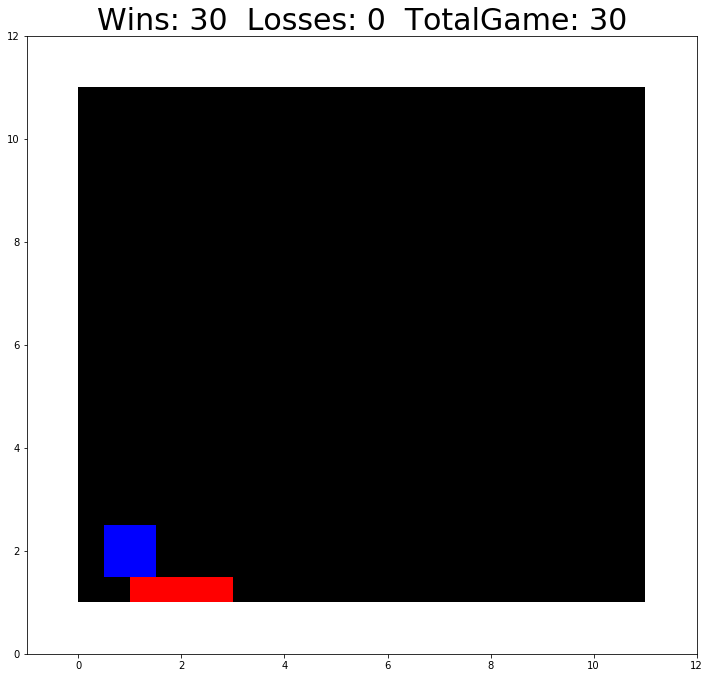

In [9]:
# -*- coding: utf-8 -*-

# 설정값들을 정의합니다.
gridSize = 10
maxGames = 30
env = CatchEnvironment(gridSize)
winCount = 0
loseCount = 0
numberOfGames = 0

# 화면을 그리기 위한 설정들을 정의합니다.
ground = 1
plot = pl.figure(figsize=(12,12))
axis = plot.add_subplot(111, aspect='equal')
axis.set_xlim([-1, 12])
axis.set_ylim([0, 12])

# 파라미터를 불러오기 위한 tf.train.Saver() class를 선언합니다.
saver = tf.train.Saver()

# 현재 상태를 그리기 위한 drawState 함수를 정의합니다.
def drawState(fruitRow, fruitColumn, basket, gridSize):
    # 과일이 몇번째 세로축에 있는지 정의합니다.
    fruitX = fruitColumn 
    # 과일이 몇번째 가로축에 있는지 정의합니다.
    fruitY = (gridSize - fruitRow + 1)
    # 승리 횟수, 패배 횟수, 전체 게임 횟수를 화면 상단에 출력합니다.
    statusTitle = "Wins: " + str(winCount) + "  Losses: " + str(loseCount) + "  TotalGame: " + str(numberOfGames)
    axis.set_title(statusTitle, fontsize=30)
    for p in [
        # 배경의 위치를 지정합니다.
        patches.Rectangle(
        ((ground - 1), (ground)), 11, 10,
        facecolor="#000000"      # Black
    ),
    # 바구니의 위치를 지정합니다.
    patches.Rectangle(
        (basket - 1, ground), 2, 0.5,
        facecolor="#FF0000"     # Red
    ),
    # 과일의 위치를 지정합니다.
    patches.Rectangle(
        (fruitX - 0.5, fruitY - 0.5), 1, 1,
        facecolor="#0000FF"       # Blue
    ),   
    ]:
        axis.add_patch(p)
    display.clear_output(wait=True)
    display.display(pl.gcf())


with tf.Session() as sess:    
    # 저장된 파라미터를 불러옵니다. 
    saver.restore(sess, os.getcwd()+"/model.ckpt")
    print('저장된 파라미터를 불러왔습니다!')
    
    # maxGames 횟수만큼 게임을 플레이합니다.
    while (numberOfGames < maxGames):
        numberOfGames = numberOfGames + 1
     
        # 최초의 상태를 정의합니다.
        isGameOver = False
        fruitRow, fruitColumn, basket = env.reset()
        currentState = env.observe()
        drawState(fruitRow, fruitColumn, basket, gridSize)
        
        while (isGameOver != True):
        # 현재 상태를 DQN의 입력값으로 넣고 구한 Q값중 가장 큰 Q값을 갖는 행동을 취합니다.
            q = sess.run(y_pred, feed_dict={x: currentState})
            action = q.argmax()

            # 행동을 취하고 다음 상태로 넘어갑니다.
            nextState, reward, gameOver, stateInfo = env.act(action)    
            fruitRow = stateInfo[0]
            fruitColumn = stateInfo[1]
            basket = stateInfo[2]
     
            # 과일을 받아내면 winCount를 1 늘리고 과일을 받아내지 못하면 loseCount를 1 늘립니다.
            if (reward == 1):
                winCount = winCount + 1
            elif (reward == -1):
                loseCount = loseCount + 1

            currentState = nextState
            isGameOver = gameOver
            drawState(fruitRow, fruitColumn, basket, gridSize)
            # 다음 행동을 취하기 전에 0.05초의 일시정지를 줍니다.
            time.sleep(0.05)

# 최종 출력결과 이미지를 하나로 정리합니다.
display.clear_output(wait=True)